In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import statistics
from math import pi
from matplotlib.gridspec import GridSpec
from dateutil.relativedelta import *
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import scipy.stats as sts
import pingouin as pg
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from mpl_toolkits.mplot3d import Axes3D
import sklearn.metrics as me
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.model_selection import cross_val_score, cross_val_predict, RepeatedKFold 
from sklearn.linear_model import LinearRegression, LogisticRegression
from collections import Counter
import copy
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from statsmodels.stats import weightstats as stests
from statsmodels.stats.weightstats import *

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
!python3 '/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/main_generate_json_files.py' --all_tweets True

Starting script...
Removing existing file...
Ending script...


In [3]:
data = pd.read_json(r'/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/alldata.json')
data.head()

,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
id_str_twitter,23781146,15148309,927028057763995648,77648005,3429765093,10794662,1034514325644431361,529445600,12050562,62314491,18289937,172880784,18609547,2164986296,1026783544457273345,109604376,1040939562774790144,69734383,119897261
participant_id,1,2,3,None,4,5,6,None,7,8,None,9,10,11,12,13,14,15,16
name,Fe Rebelatto,Sommelier de Airbnb,✪ Felippe,Conference Distinguished Specialist,Paula Santana,Maharaja of the Legacies,Jessica,"var nickname = ""Riquettinha"";",Roberta Arcoverde,Gabriela,Thamara Andrade,felipe.ts ⚡,Juan Lopes,Rafael Dantas,iagor com i,T̷o̷m̷o̷y̷o̷ ̷ F̷u̷r̷a̷c̷ã̷o̷,Esdras Xavier,belle-🏴.dev || twitch.tv/bellesamways,Willian Justen
screen_name,rebelatto,Guilh_rm_,FelippeRegazio,NannoKa,psanrosa13,rponte,dev_jessi,Riquettinha,rla4,Gabrielathalita,thamyk,felipefialho_,juanplopes,RaffaelDantass,Iagor51,RafaelMansilha,esdras_xavieer,bellesamways,Willian_justen
location,"Rio de Janeiro, Brasil",somewhere in Brazil,,Ctba-PR Brasil,Brasil,"Ceará, Brazil",São Paulo - Brasil,"Belo Horizonte, Brasil","Sao Paulo, Brazil",Belo Horizonte,"Belo Horizonte, Brazil.",Dark Side of the Moon,"Rio de Janeiro, Brasil","São Paulo, Brasil",Pvh,"Palmas, Tocantins, Brasil","Jaraguá do Sul, Brasil",Curitiba,"Petrópolis, Brasil"


In [4]:
count = 1
json_data = {
    'Participant': [],
    'Id User': [],
    'O': [],
    'C': [],
    'E': [],
    'A': [],
    'N': []
}

for d in data:
    if data[d]['bigfive']:
        b = pd.DataFrame(data[d]['bigfive'])
        b.columns = ['id', 'O', 'C', 'E', 'A', 'N', 'Id User']
        b['Participant'] = count
        del b['id']
        b = b[['Participant', 'Id User', 'O', 'C', 'E', 'A', 'N']]
        json_data['Participant'].append(b['Participant'][0])
        json_data['Id User'].append(b['Id User'][0])
        json_data['O'].append(b['O'][0])
        json_data['C'].append(b['C'][0])
        json_data['E'].append(b['E'][0])
        json_data['A'].append(b['A'][0])
        json_data['N'].append(b['N'][0])
        count += 1
        
bf = pd.DataFrame(json_data)
bf

,Participant,Id User,O,C,E,A,N
0,1,26,37,43,36,24,26
1,2,27,41,43,34,22,23
2,3,28,43,46,31,24,15
3,4,30,17,33,33,22,39
4,5,31,22,33,31,20,8
5,6,32,39,49,39,28,15
6,7,34,35,35,32,26,16
7,8,35,29,45,34,35,29
8,9,37,40,46,38,22,21
9,10,38,32,46,19,18,28


In [5]:
tweets = []

for d in data:
    if data[d]['bigfive']:
        tweets.append(data[d]['tweets'])

final_tweets = []
for i in tweets:
    final_tweets.extend(i)
    
print(len(final_tweets))

91632


In [6]:
def create_tweets_df(tweets):
    df = pd.DataFrame(final_tweets)

    df.columns = ["id", "id_str_twitter", "text", "created_at", "favorite_count", "retweet_count", 
                  "lang", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity", 
                  "vader_sentiment_analysis_polarity_5_cat", "oplexicon_sentiment_analysis_score",
                  "oplexicon_sentiment_analysis_polarity", "oplexicon_sentiment_analysis_polarity_5_cat",
                  "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                  "sentistrength_sentiment_analysis_polarity_5_cat", "sentilexpt_sentiment_analysis_score",
                  "sentilexpt_sentiment_analysis_polarity", "sentilexpt_sentiment_analysis_polarity_5_cat",
                  "liwc_sentiment_analysis_score", "liwc_sentiment_analysis_polarity",
                  "liwc_sentiment_analysis_polarity_5_cat", "final_score", "final_score_ensemble",
                  "final_polarity", "final_polarity_ensemble", "text_updated", "is_retweet", "retweet_updated"
                 ]
    
    del df["text_updated"]
#     del df["is_retweet"]
    del df["retweet_updated"]
    del df["favorite_count"]
    del df["retweet_count"]
    del df["lang"]
    del df["id_str_twitter"]
    
    return df

In [7]:
def clean_tweets(df):
    del df['text']
    del df['vader_sentiment_analysis_score']
    del df['vader_sentiment_analysis_polarity']
    del df['vader_sentiment_analysis_polarity_5_cat']
    del df['oplexicon_sentiment_analysis_score']
    del df['oplexicon_sentiment_analysis_polarity']
    del df['oplexicon_sentiment_analysis_polarity_5_cat']
    del df['sentistrength_sentiment_analysis_score']
    del df['sentistrength_sentiment_analysis_polarity']
    del df['sentistrength_sentiment_analysis_polarity_5_cat']
    del df['sentilexpt_sentiment_analysis_score']
    del df['sentilexpt_sentiment_analysis_polarity']
    del df['sentilexpt_sentiment_analysis_polarity_5_cat']
    del df['liwc_sentiment_analysis_score']
    del df['liwc_sentiment_analysis_polarity']
    del df['liwc_sentiment_analysis_polarity_5_cat']
    del df['final_score']
    del df['final_polarity']
    return df

In [8]:
tweets_df = create_tweets_df(final_tweets)
print(len(tweets_df))
tweets_df.head()

91632


,id,text,created_at,id_user,vader_sentiment_analysis_score,vader_sentiment_analysis_polarity,vader_sentiment_analysis_polarity_5_cat,oplexicon_sentiment_analysis_score,oplexicon_sentiment_analysis_polarity,oplexicon_sentiment_analysis_polarity_5_cat,...,sentilexpt_sentiment_analysis_polarity,sentilexpt_sentiment_analysis_polarity_5_cat,liwc_sentiment_analysis_score,liwc_sentiment_analysis_polarity,liwc_sentiment_analysis_polarity_5_cat,final_score,final_score_ensemble,final_polarity,final_polarity_ensemble,is_retweet
0,102566,"Atenção, estou mudando os moveis da sala de lu...",2021-03-31T19:13:28,26,-0.4588,neg,w_neg,0.000000,neu,neu,...,neu,neu,0.0000,neu,neu,-0.091760,0.000,neg,neu,0
1,102567,RT @andreariell: o cancelamento dos participan...,2021-03-31T12:28:56,26,0.0000,neu,neu,0.000000,neu,neu,...,neu,neu,-0.0667,neg,w_neg,-0.013340,0.000,neg,neu,1
2,102568,RT @AndrewBrobston: NOVA ANTECIPAÇÃO\nBoa tard...,2021-03-31T12:17:06,26,0.7734,pos,s_pos,0.458831,pos,w_pos,...,neu,neu,0.0196,pos,w_pos,0.250366,0.000,pos,neu,1
3,102569,"@DouglasMarendaz Eu amo muito meu pai, mas fal...",2021-03-31T11:46:04,26,-0.8720,neg,s_neg,0.458831,pos,w_pos,...,neg,w_neg,0.0400,pos,w_pos,-0.074634,0.000,neg,neu,0
4,102571,@lilicebk Eu cresci numa casa cheia de gente e...,2021-03-30T17:58:24,26,-0.6808,neg,s_neg,0.000000,neu,neu,...,neg,w_neg,0.0000,neu,neu,-0.186160,-0.125,neg,neg,0


In [9]:
print(tweets_df['id_user'].value_counts())

43    24077
32     9385
37     6456
31     5993
28     5932
26     5038
44     4928
38     4708
27     4548
41     4386
39     3944
30     3171
42     2698
35     2595
40     2228
34     1545
Name: id_user, dtype: int64


In [10]:
users = list(tweets_df['id_user'].unique())
summary_tweets_df = pd.DataFrame()

for u in users:
    tweets = tweets_df.query('id_user == {}'.format(u))
    u_dict = {
        'id_user': u,
        'total_tweets': len(tweets),
        'total_retweets': len(tweets.query('is_retweet == {}'.format(1))),
        'total_original_tweets': len(tweets.query('is_retweet == {}'.format(0)))
    }
    
    temp_df = pd.DataFrame([u_dict])
    summary_tweets_df = summary_tweets_df.append(temp_df)
    
summary_tweets_df

,id_user,total_tweets,total_retweets,total_original_tweets
0,26,5038,469,4569
0,27,4548,172,4376
0,28,5932,104,5828
0,30,3171,467,2704
0,31,5993,576,5417
0,32,9385,192,9193
0,34,1545,112,1433
0,35,2595,385,2210
0,37,6456,5,6451
0,38,4708,150,4558


In [11]:
summary_tweets_df.describe()

,id_user,total_tweets,total_retweets,total_original_tweets
count,16.00000,16.000000,16.000000,16.000000
mean,35.43750,5727.000000,787.687500,4939.312500
std,5.92136,5256.843831,2090.341399,3421.310582
min,26.00000,1545.000000,5.000000,1433.000000
25%,30.75000,3052.750000,140.500000,2642.750000
50%,36.00000,4628.000000,215.500000,4467.000000
75%,40.25000,5947.250000,467.500000,5519.750000
max,44.00000,24077.000000,8596.000000,15481.000000


In [12]:
for i in tweets_df.index:
    t = tweets_df.iloc[i]
    d = pd.to_datetime(t['created_at']).to_pydatetime()
    date_from = datetime.datetime(year = d.year, month = d.month, day = d.day, hour = 9)
    date_to = datetime.datetime(year = d.year, month = d.month, day = d.day, hour = 18)
    if date_from <= d <= date_to and d.weekday() in [0,1,2,3,4]:
        tweets_df.at[i,'is_work_time'] = int(1)
    else:
        tweets_df.at[i,'is_work_time'] = int(0)

In [13]:
print(tweets_df['is_work_time'].value_counts())

0.0    52703
1.0    38929
Name: is_work_time, dtype: int64


In [14]:
tweets_df.head()

,id,text,created_at,id_user,vader_sentiment_analysis_score,vader_sentiment_analysis_polarity,vader_sentiment_analysis_polarity_5_cat,oplexicon_sentiment_analysis_score,oplexicon_sentiment_analysis_polarity,oplexicon_sentiment_analysis_polarity_5_cat,...,sentilexpt_sentiment_analysis_polarity_5_cat,liwc_sentiment_analysis_score,liwc_sentiment_analysis_polarity,liwc_sentiment_analysis_polarity_5_cat,final_score,final_score_ensemble,final_polarity,final_polarity_ensemble,is_retweet,is_work_time
0,102566,"Atenção, estou mudando os moveis da sala de lu...",2021-03-31T19:13:28,26,-0.4588,neg,w_neg,0.000000,neu,neu,...,neu,0.0000,neu,neu,-0.091760,0.000,neg,neu,0,0.0
1,102567,RT @andreariell: o cancelamento dos participan...,2021-03-31T12:28:56,26,0.0000,neu,neu,0.000000,neu,neu,...,neu,-0.0667,neg,w_neg,-0.013340,0.000,neg,neu,1,1.0
2,102568,RT @AndrewBrobston: NOVA ANTECIPAÇÃO\nBoa tard...,2021-03-31T12:17:06,26,0.7734,pos,s_pos,0.458831,pos,w_pos,...,neu,0.0196,pos,w_pos,0.250366,0.000,pos,neu,1,1.0
3,102569,"@DouglasMarendaz Eu amo muito meu pai, mas fal...",2021-03-31T11:46:04,26,-0.8720,neg,s_neg,0.458831,pos,w_pos,...,w_neg,0.0400,pos,w_pos,-0.074634,0.000,neg,neu,0,1.0
4,102571,@lilicebk Eu cresci numa casa cheia de gente e...,2021-03-30T17:58:24,26,-0.6808,neg,s_neg,0.000000,neu,neu,...,w_neg,0.0000,neu,neu,-0.186160,-0.125,neg,neg,0,1.0


In [15]:
# - Criação do dataset com os scores das inferências geradas pelo ensemble 
# - Dois datasets: um com scores para tweets dentro do horário de trabalho
#   e outro para tweets fora do horário de trabalho           

def create_datasets(df):
    work_times = df.loc[df['is_work_time'] == 1]
    non_work_times = df.loc[df['is_work_time'] == 0]
    work_times_df = pd.DataFrame(work_times)
    non_work_times_df = pd.DataFrame(non_work_times)
    return (work_times_df, non_work_times_df)

In [16]:
# FAZER WORKING X NON WORKING PARA CADA PARTICIPANTE PARE VERIFICAR SE CONSEGUIMOS SIGNIFICANCIA ESTATISTICA

users = list(tweets_df['id_user'].unique())

for u in users:
    p_id = data[u]['participant_id']
    tweets = tweets_df.query('id_user == {}'.format(u))
    work_times_df, non_work_times_df = create_datasets(tweets)
#     work_times_df, non_work_times_df = remove_neutral_tweets(work_times_df, non_work_times_df)
#     work_times_df, non_work_times_df = scale_datasets(work_times_df, non_work_times_df)
#     print(calculate_mwu_statistic(work_times_df, non_work_times_df))
    d1 = DescrStatsW(work_times_df['final_score_ensemble'])
    d2 = DescrStatsW(non_work_times_df['final_score_ensemble'])
    cm1 = CompareMeans(d1, d2)
    print(bf[bf['Id User'] == u])
    print(cm1.summary(use_t = False, alpha = 0.05, value = 0))
    ztest, pval = stests.ztest(x1 = work_times_df['final_score_ensemble'],
                               x2 = non_work_times_df['final_score_ensemble'],
                               value=0,
                               alternative='two-sided')
    print('P{} -> ztest: {} p-val: {}'.format(p_id, float(ztest), float(pval)))
    print('Tweets working time: {}'.format(len(work_times_df['final_score_ensemble'])))
    print('Mean Working period: ', round(np.mean(work_times_df['final_score_ensemble']), 4))
#     print(sts.t.interval(0.95, len(work_times_df)-1, loc=np.mean(work_times_df), scale=sts.sem(work_times_df)))
    print('CI 95%: ', stests.zconfint(work_times_df['final_score_ensemble'],
                                      x2=non_work_times_df['final_score_ensemble'],
                                      value=0, alpha=0.05, alternative='two-sided'))
    print('Tweets non-working time: {}'.format(len(non_work_times_df['final_score_ensemble'])))
    print('Mean Non-working period: ', round(np.mean(non_work_times_df['final_score_ensemble']), 4))
#     print('CI 95%: ', stests.zconfint(non_work_times_df, value=0, alpha=0.05, alternative='two-sided'))
    print()


   Participant  Id User   O   C   E   A   N
0            1       26  37  43  36  24  26
                          Test for equality of means                          
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1      0.0026      0.005      0.480      0.631      -0.008       0.013
P1 -> ztest: 0.4803143021016286 p-val: 0.6310039206518163
Tweets working time: 2561
Mean Working period:  -0.0212
CI 95%:  (-0.00801954807886248, 0.013226055652089473)
Tweets non-working time: 2477
Mean Non-working period:  -0.0238

   Participant  Id User   O   C   E   A   N
1            2       27  41  43  34  22  23
                          Test for equality of means                          
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.0086      0.005     -

13           14       42  29  43  27  23  35
                          Test for equality of means                          
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.0008      0.007     -0.122      0.903      -0.014       0.013
P14 -> ztest: -0.12202613429602732 p-val: 0.9028783207583732
Tweets working time: 890
Mean Working period:  -0.0308
CI 95%:  (-0.014367748777414063, 0.012683551695033629)
Tweets non-working time: 1808
Mean Non-working period:  -0.0299

    Participant  Id User   O   C   E   A   N
14           15       43  29  45  36  27  32
                          Test for equality of means                          
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1      0.0041      0.003      1.505      0.132      -0.001       0.0

In [17]:
work_times_df, non_work_times_df = create_datasets(tweets_df)

In [18]:
pg.normality(work_times_df)

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


,W,pval,normal
id,0.945936,0.000000e+00,False
id_user,0.887147,0.000000e+00,False
vader_sentiment_analysis_score,0.972064,0.000000e+00,False
oplexicon_sentiment_analysis_score,0.945567,0.000000e+00,False
sentistrength_sentiment_analysis_score,0.909957,0.000000e+00,False
sentilexpt_sentiment_analysis_score,0.919422,0.000000e+00,False
liwc_sentiment_analysis_score,0.847224,0.000000e+00,False
final_score,0.996256,2.917771e-29,False
final_score_ensemble,0.965329,0.000000e+00,False
is_retweet,0.360395,0.000000e+00,False


/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

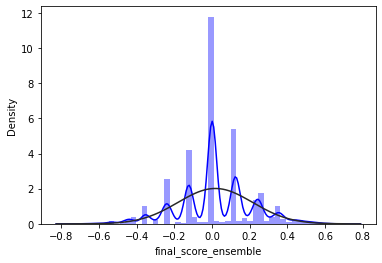

In [19]:
sns.distplot(work_times_df['final_score_ensemble'], fit = sts.norm, kde = True, color = 'blue')
plt.plot()

In [20]:
pg.normality(non_work_times_df)

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


,W,pval,normal
id,0.939403,0.000000e+00,False
id_user,0.865225,0.000000e+00,False
vader_sentiment_analysis_score,0.971734,0.000000e+00,False
oplexicon_sentiment_analysis_score,0.947087,0.000000e+00,False
sentistrength_sentiment_analysis_score,0.909681,0.000000e+00,False
sentilexpt_sentiment_analysis_score,0.923227,0.000000e+00,False
liwc_sentiment_analysis_score,0.849033,0.000000e+00,False
final_score,0.995809,1.876624e-34,False
final_score_ensemble,0.966166,0.000000e+00,False
is_retweet,0.438006,0.000000e+00,False


/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

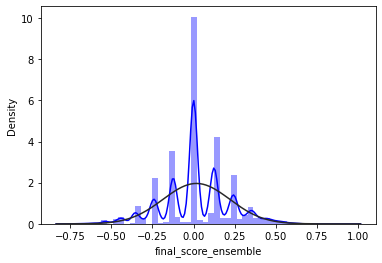

In [21]:
sns.distplot(non_work_times_df['final_score_ensemble'], fit = sts.norm, kde = True, color = 'blue')
plt.plot()

In [22]:
# Tentativa de t-test

sts.ttest_ind(work_times_df['final_score_ensemble'], non_work_times_df['final_score_ensemble'], equal_var=False)

Ttest_indResult(statistic=-0.4505839980458342, pvalue=0.6522905512123373)

In [23]:
# print(np.mean(tweets_df['final_score_ensemble']))
# print(np.mean(work_times_df))
# print(np.mean(non_work_times_df))

In [24]:
# Excluindo os tweets neutros

def remove_neutral_tweets(work_times_df, non_work_times_df):
    work_times_df = work_times_df[work_times_df['final_score_ensemble'] != 0]
#     print(len(work_times_df))
    non_work_times_df = non_work_times_df[non_work_times_df['final_score_ensemble'] != 0]
#     print(len(non_work_times_df))
    return (work_times_df, non_work_times_df)

In [25]:
# Tentativa de t-test

sts.ttest_ind(work_times_df['final_score_ensemble'], non_work_times_df['final_score_ensemble'], equal_var=False)

Ttest_indResult(statistic=-0.4505839980458342, pvalue=0.6522905512123373)

In [26]:
def scale_datasets(work_times_df, non_work_times_df):
    scaler = StandardScaler()
    work_times_df_scaled = pd.DataFrame(scaler.fit_transform(work_times_df))
    non_work_times_df_scaled = pd.DataFrame(scaler.fit_transform(non_work_times_df))
    return (work_times_df_scaled, non_work_times_df_scaled)

In [28]:
# work_times_df = clean_tweets(work_times_df)
# non_work_times_df = clean_tweets(non_work_times_df)
# work_times_df.head()

# work_times_df_scaled, non_work_times_df_scaled = scale_datasets(work_times_df, non_work_times_df)

,id,created_at,id_user,final_score_ensemble,final_polarity_ensemble,is_retweet,is_work_time
1,102567,2021-03-31T12:28:56,26,0.000,neu,1,1.0
2,102568,2021-03-31T12:17:06,26,0.000,neu,1,1.0
3,102569,2021-03-31T11:46:04,26,0.000,neu,0,1.0
4,102571,2021-03-30T17:58:24,26,-0.125,neg,0,1.0
5,102572,2021-03-30T17:56:43,26,-0.250,neg,0,1.0


In [ ]:
# sns.distplot(work_times_df_scaled, fit = sts.norm, kde = True, color = 'blue')
# plt.plot()

In [ ]:
# sns.distplot(non_work_times_df_scaled, fit = sts.norm, kde = True, color = 'blue')
# plt.plot()

In [ ]:
# pg.normality(work_times_df_scaled)

In [ ]:
# pg.normality(non_work_times_df_scaled)

In [ ]:
# # Como as distribuições NÃO SÃO NORMAIS, aplica-se testes não paramétricos.

# def calculate_mwu_statistic(wt_df, nwt_df):
#     return pg.mwu(wt_df, nwt_df)

In [ ]:
# def calculate_ttest(wt_df, nwt_df):
#     return sts.ttest_ind(wt_df, nwt_df, equal_var=False)

In [ ]:
# # Cálculo da estatística Mann-Withney SEM padronizar os dados

# work_times_df, non_work_times_df = create_datasets(tweets_df)
# work_times_df, non_work_times_df = remove_neutral_tweets(work_times_df, non_work_times_df)
# result = calculate_mwu_statistic(work_times_df, non_work_times_df)
# result

In [ ]:
# # Cálculo da estatística Mann-Withney PADRONIZANDO os dados

# work_times_df, non_work_times_df = create_datasets(tweets_df)
# work_times_df, non_work_times_df = remove_neutral_tweets(work_times_df, non_work_times_df)
# work_times_df, non_work_times_df = scale_datasets(work_times_df, non_work_times_df)
# result = calculate_mwu_statistic(work_times_df, non_work_times_df)
# result

In [ ]:
# print(np.mean(work_times_df))
# print(np.mean(non_work_times_df))

In [ ]:
# # Cálculo da estatística t-test PADRONIZANDO os dados

# work_times_df, non_work_times_df = create_datasets(tweets_df)
# work_times_df, non_work_times_df = remove_neutral_tweets(work_times_df, non_work_times_df)
# work_times_df, non_work_times_df = scale_datasets(work_times_df, non_work_times_df)
# result = calculate_ttest(work_times_df, non_work_times_df)
# result

In [ ]:
# # Cálculo da estatística t-test SEM REMOVER NEUTROS E SEM PADRONIZAR os dados

# work_times_df, non_work_times_df = create_datasets()
# # work_times_df, non_work_times_df = remove_neutral_tweets(work_times_df, non_work_times_df)
# # work_times_df, non_work_times_df = scale_datasets(work_times_df, non_work_times_df)
# result = calculate_mwu_statistic(work_times_df, non_work_times_df)
# result

In [ ]:
# # Cálculo da estatística t-test SEM REMOVER NEUTROS E PADRONIZANDO os dados

# work_times_df, non_work_times_df = create_datasets(tweets_df)
# # work_times_df, non_work_times_df = remove_neutral_tweets(work_times_df, non_work_times_df)
# work_times_df, non_work_times_df = scale_datasets(work_times_df, non_work_times_df)
# result = calculate_mwu_statistic(work_times_df, non_work_times_df)
# result

In [ ]:
# work_times_df, non_work_times_df = create_datasets(tweets_df)
# work_times_df, non_work_times_df = remove_neutral_tweets(work_times_df, non_work_times_df)
# # work_times_df, non_work_times_df = scale_datasets(work_times_df, non_work_times_df)

# ztest, pval = stests.ztest(x1 = work_times_df, x2 = non_work_times_df, value=0, alternative='two-sided')
# print(float(pval))

# GERAÇÃO DE GRÁFICOS

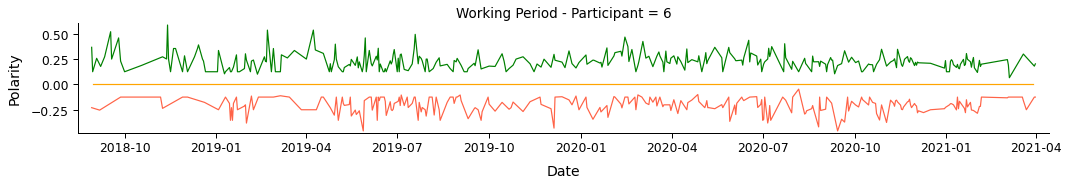

In [30]:
users = list(tweets_df['id_user'].unique())

for u in users:
    p_id = data[u]['participant_id']
    if p_id == 6:
        tweets = tweets_df.query('id_user == {}'.format(u))
        work_times_df, non_work_times_df = create_datasets(tweets)
        work_times_df = clean_tweets(work_times_df)

        work_times_df = work_times_df.sort_values(by='created_at')
        work_times_df["created_at"] = pd.to_datetime(work_times_df["created_at"])
        work_times_df['date_minus_time'] = work_times_df["created_at"].apply(lambda t : datetime.datetime(year=t.year, 
                                                                                  month=t.month,
                                                                                  day=t.day))

        work_times_df.set_index(work_times_df["date_minus_time"],inplace=True)

        df_pos = work_times_df.query("final_polarity_ensemble == 'pos'")
        df_pos = pd.DataFrame(df_pos['final_score_ensemble'].resample('D').mean())

        df_neg = work_times_df.query("final_polarity_ensemble == 'neg'")
        df_neg = pd.DataFrame(df_neg['final_score_ensemble'].resample('D').mean())

        df_final = df_pos.append(df_neg)
        df_final = df_final.fillna(0)

        df_final['id_user'] = u
        df_final['date'] = df_final.index
        df_final = df_final.reset_index(drop=True)

        df_final.sort_values(by=['date'])
        df_final['Working Period - Participant'] = p_id

        df_final['pol'] = np.where(df_final['final_score_ensemble'] > 0, 'pos', np.where(df_final['final_score_ensemble'] < 0, 'neg', 'neu'))

        with sns.plotting_context('paper', font_scale = 1.4):
            g = sns.FacetGrid(df_final, row="Working Period - Participant", hue='pol', legend_out=True, palette=['green','orange','tomato'])
            g.fig.set_size_inches(15,2.7)
            g.map(sns.lineplot, 'date', "final_score_ensemble")

            g.set_axis_labels("Date", 'Polarity', fontsize=14)

            for ax in g.axes:
                for a in ax:
                    a.set_ylabel("Polarity", fontsize=14, labelpad=10)
                    a.set_xlabel("Date", fontsize=14, labelpad=10)

            plt.margins(0.015, tight=True)

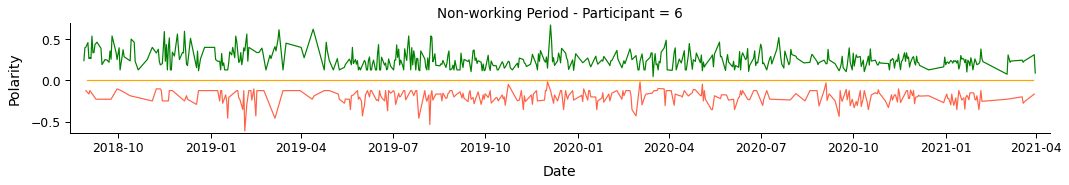

In [31]:
users = list(tweets_df['id_user'].unique())

for u in users:
    p_id = data[u]['participant_id']
    if p_id == 6:
        tweets = tweets_df.query('id_user == {}'.format(u))
        work_times_df, non_work_times_df = create_datasets(tweets)
        non_work_times_df = clean_tweets(non_work_times_df)

        non_work_times_df = non_work_times_df.sort_values(by='created_at')
        non_work_times_df["created_at"] = pd.to_datetime(non_work_times_df["created_at"])
        non_work_times_df['date_minus_time'] = non_work_times_df["created_at"].apply(lambda t : datetime.datetime(year=t.year, 
                                                                                  month=t.month,
                                                                                  day=t.day))

        non_work_times_df.set_index(non_work_times_df["date_minus_time"],inplace=True)

        df_pos = non_work_times_df.query("final_polarity_ensemble == 'pos'")
        df_pos = pd.DataFrame(df_pos['final_score_ensemble'].resample('D').mean())

        df_neg = non_work_times_df.query("final_polarity_ensemble == 'neg'")
        df_neg = pd.DataFrame(df_neg['final_score_ensemble'].resample('D').mean())

        df_final = df_pos.append(df_neg)
        df_final = df_final.fillna(0)

        df_final['id_user'] = u
        df_final['date'] = df_final.index
        df_final = df_final.reset_index(drop=True)

        df_final.sort_values(by=['date'])
        df_final['Non-working Period - Participant'] = p_id

        df_final['pol'] = np.where(df_final['final_score_ensemble'] > 0, 'pos', np.where(df_final['final_score_ensemble'] < 0, 'neg', 'neu'))

        with sns.plotting_context('paper', font_scale = 1.4):
            g = sns.FacetGrid(df_final, row="Non-working Period - Participant", hue='pol', legend_out=True, palette=['green','orange','tomato'])
            g.fig.set_size_inches(15,2.7)
            g.map(sns.lineplot, 'date', "final_score_ensemble")

            g.set_axis_labels("Date", 'Polarity', fontsize=14)

            for ax in g.axes:
                for a in ax:
                    a.set_ylabel("Polarity", fontsize=14, labelpad=10)
                    a.set_xlabel("Date", fontsize=14, labelpad=10)

            plt.margins(0.015, tight=True)

In [40]:
def plot_point_chart(df, id_user, title_prefix):

    first_date = df.iloc[0]['date_minus_time']
    
    for i in range(1,13):
        end_date = first_date + relativedelta(months=+3)
        mask = (df['created_at'] >= first_date) & (df['created_at'] < end_date)
        new_df = df.loc[mask]
        
        fig, ax = plt.subplots(figsize=(22, 2.6))
    
        x = new_df['date_minus_time']
        y = new_df['final_score_ensemble']

        x_ticks = x

        colors = {'pos':'green', 'neu':'orange', 'neg':'tomato'}

        plt.yticks(list(np.arange(-1.0, 1.1, 0.1))[0::2], fontsize=14)
        plt.xticks(x_ticks, rotation='vertical', fontsize=14)

        date_form = DateFormatter("%Y-%m-%d")
        ax.xaxis.set_major_formatter(date_form)
        plt.xlabel('Day', fontsize=16, labelpad=10)
        plt.ylabel('Polarity Score', fontsize=16, labelpad=10)
        
        plt.title(title_prefix + ' Participant {} - From {} To {}'.format(df['Participant'].iloc[0], 
                                                          first_date.strftime("%Y-%m-%d"), 
                                                          end_date.strftime("%Y-%m-%d")), 
                  fontsize=16, pad=10)
        
        plt.rcParams.update({
            "savefig.facecolor": (1.0, 1.0, 1.0)
        })
        
#         plt.legend()

        plt.scatter(x, y, alpha=0.7, c=new_df['final_polarity_ensemble'].map(colors))
        
#         plt.savefig('images/scatter_P{}_U{}_{}_{}.pdf'.format(count, id_user, first_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d")),bbox_inches='tight',transparent=False)
        
        first_date = end_date

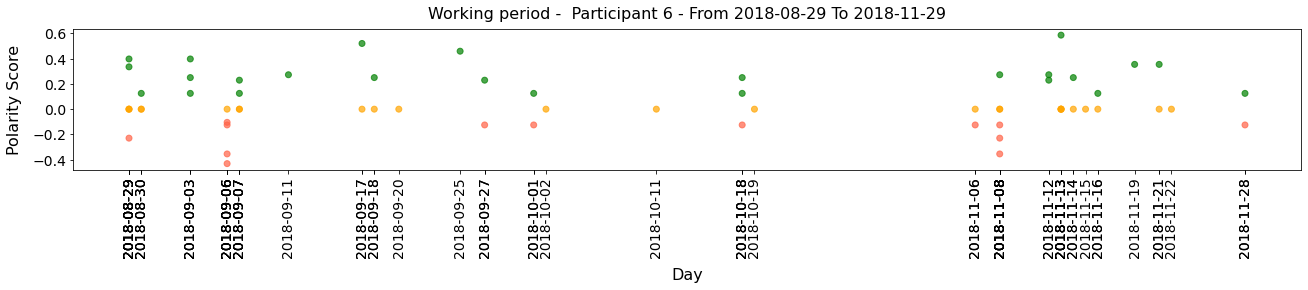

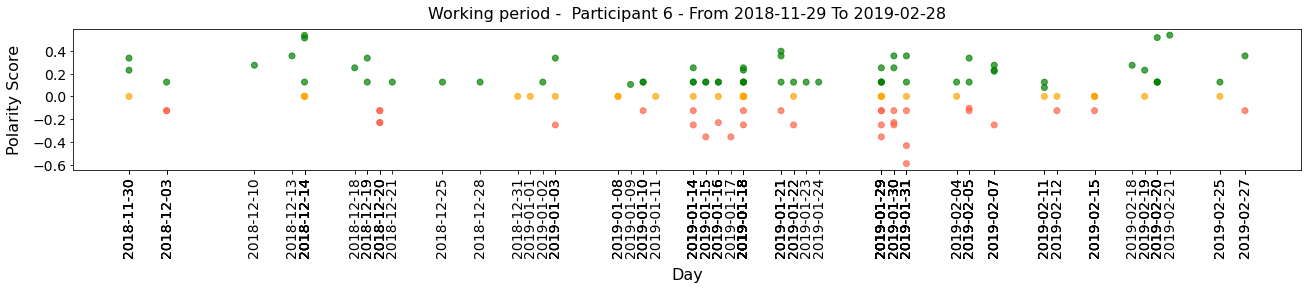

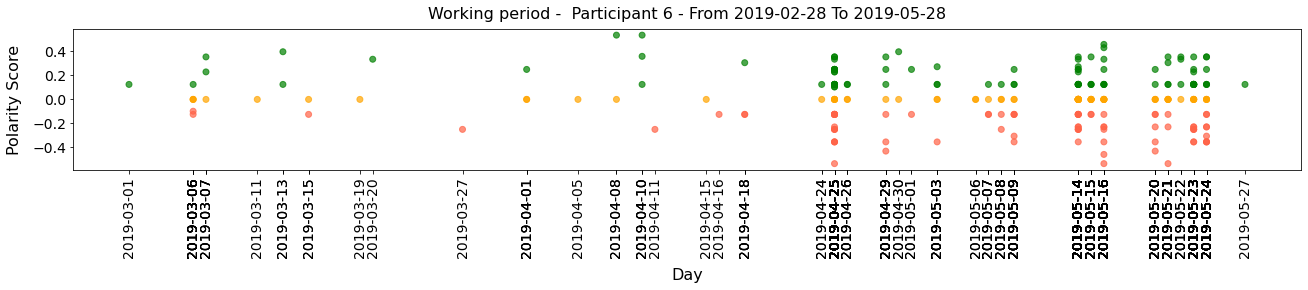

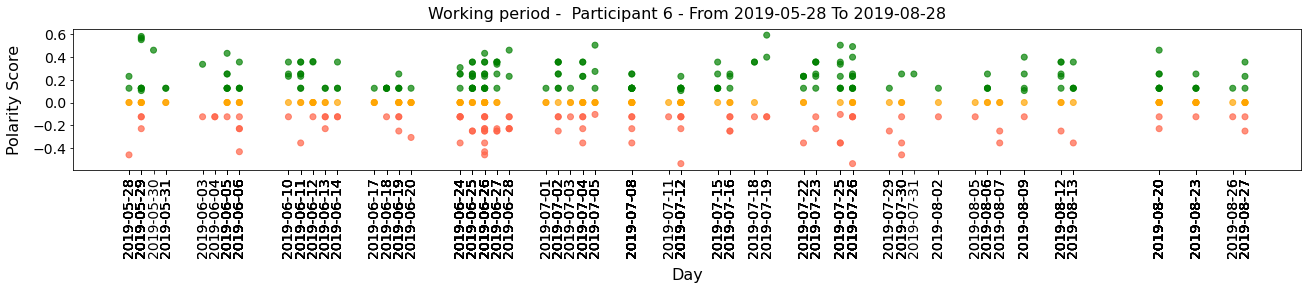

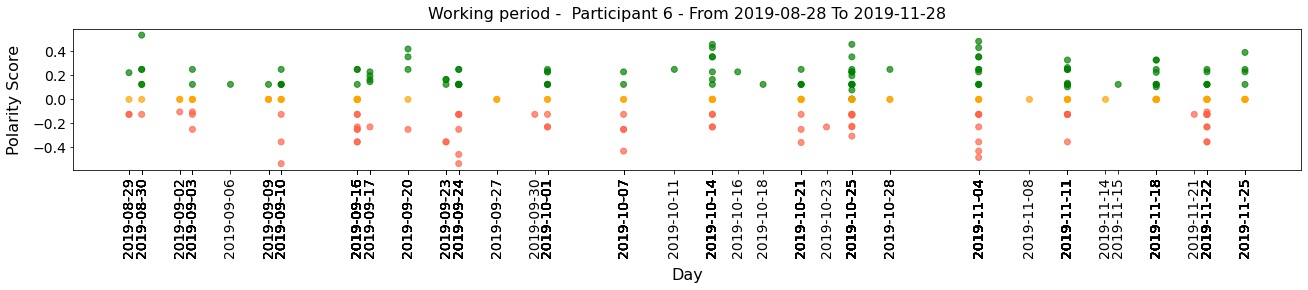

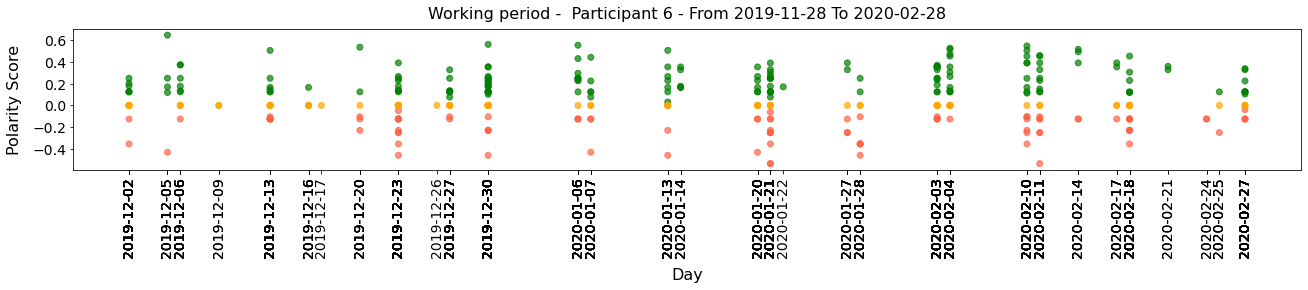

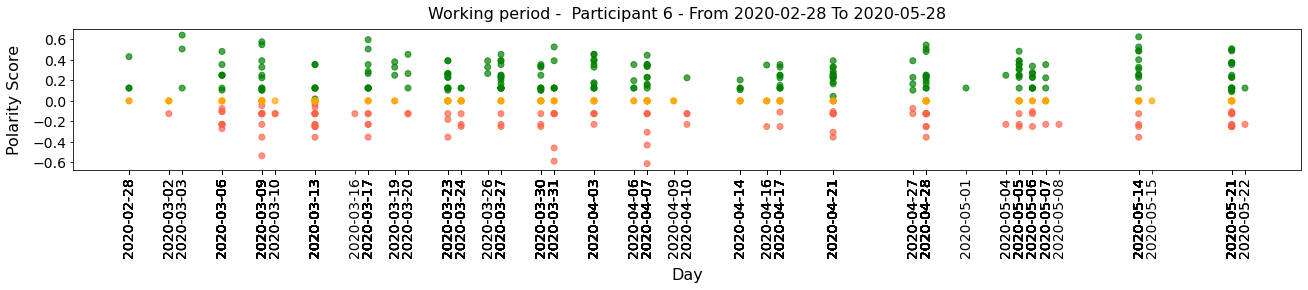

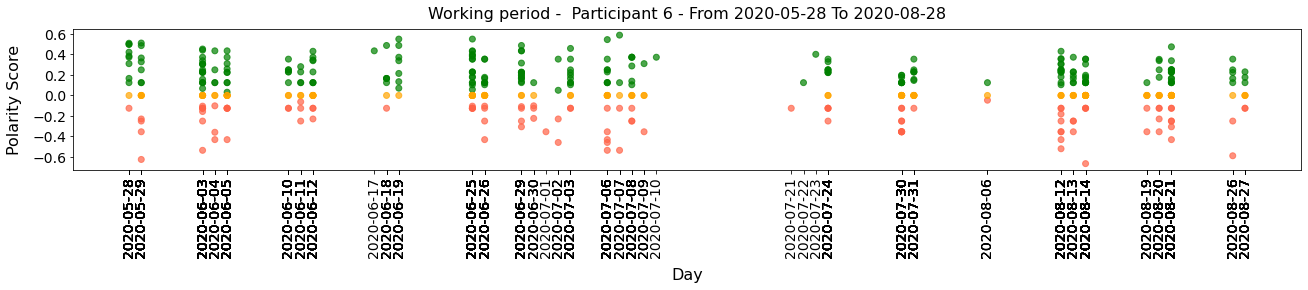

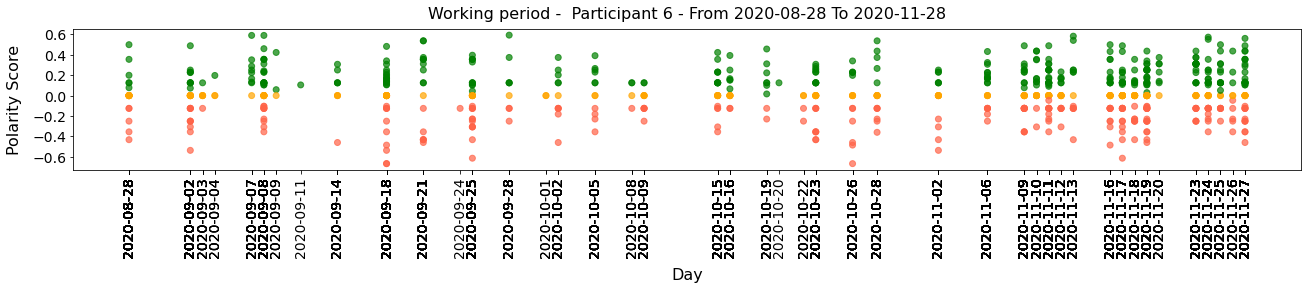

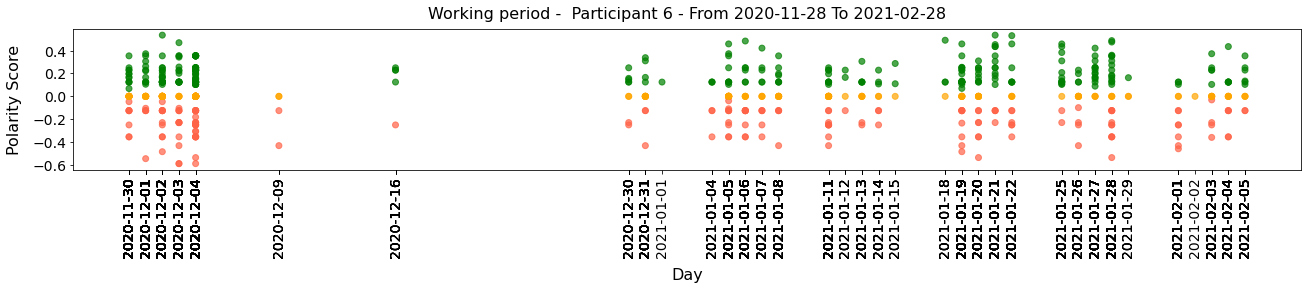

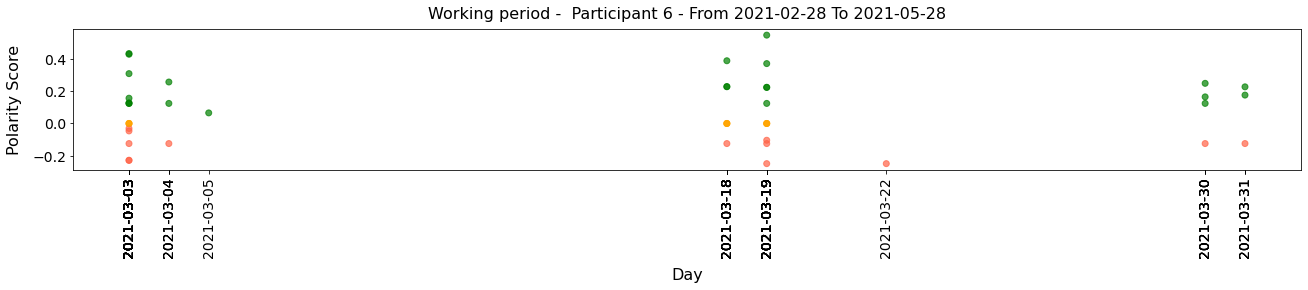

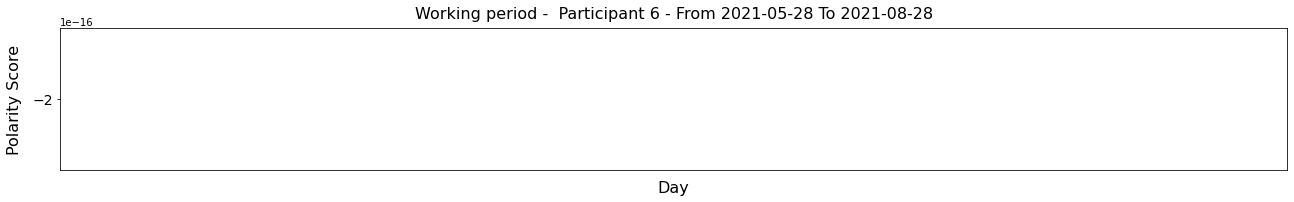

In [41]:
users = list(tweets_df['id_user'].unique())

for u in users:
    p_id = data[u]['participant_id']
    tweets = tweets_df.query('id_user == {}'.format(u))
    work_times_df, non_work_times_df = create_datasets(tweets)
    work_times_df = clean_tweets(work_times_df)
    
    work_times_df['Participant'] = p_id
    work_times_df = work_times_df.sort_values(by='created_at')
    work_times_df["created_at"] = pd.to_datetime(work_times_df["created_at"])
    work_times_df['date_minus_time'] = work_times_df["created_at"].apply(lambda t : datetime.datetime(year=t.year, 
                                                                              month=t.month,
                                                                              day=t.day))
    
    if p_id == 6:
        plot_point_chart(work_times_df, u, 'Working period - ')

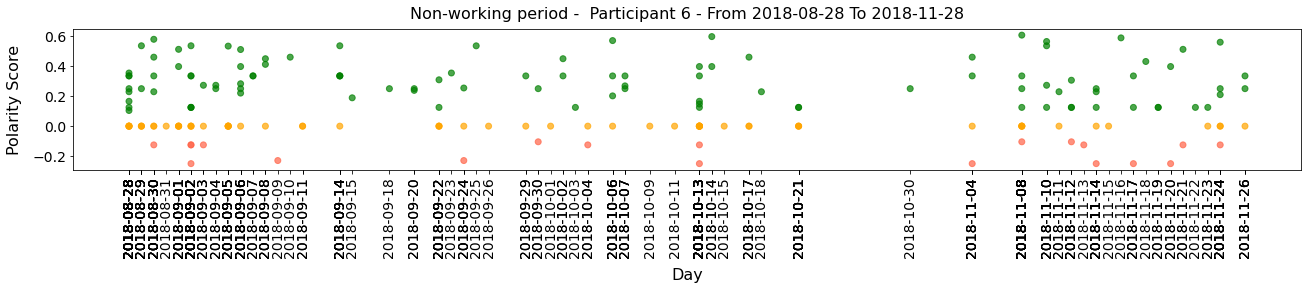

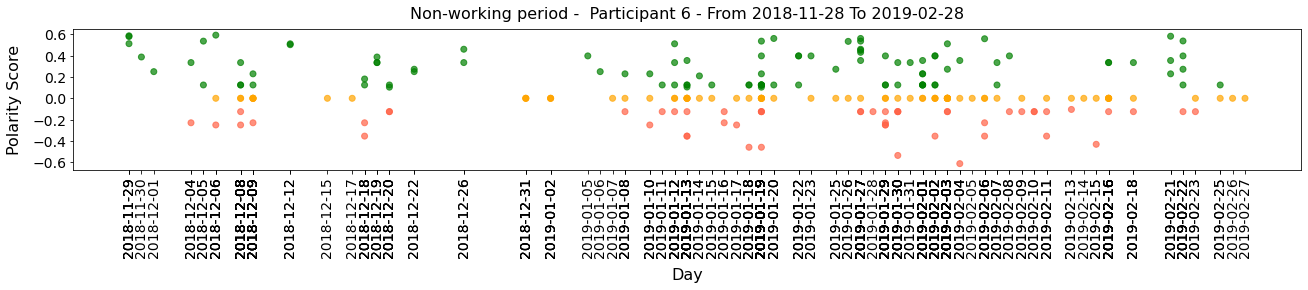

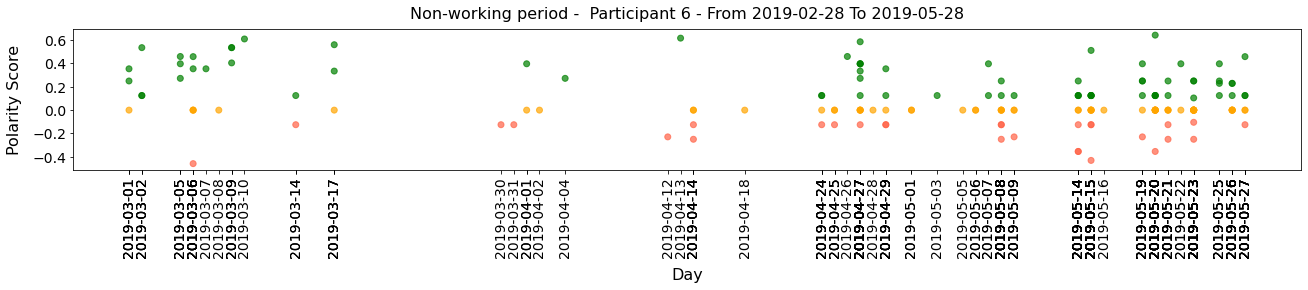

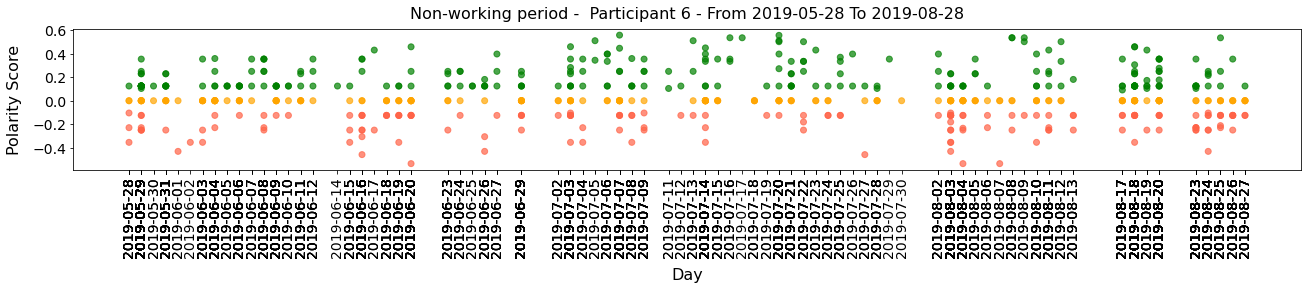

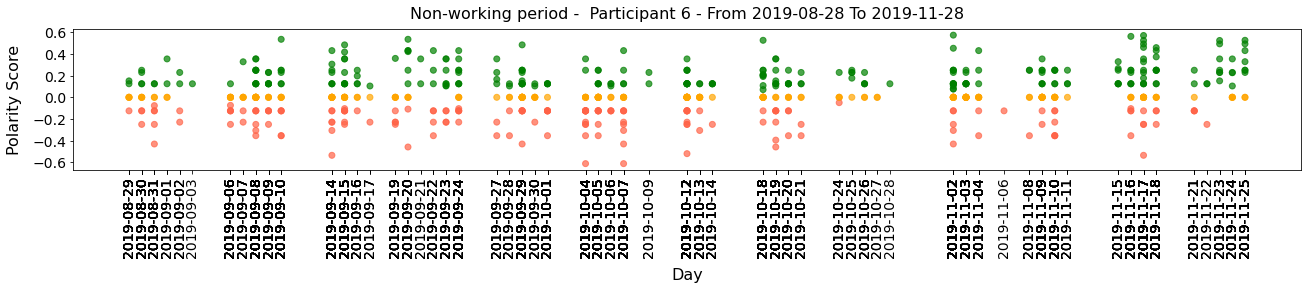

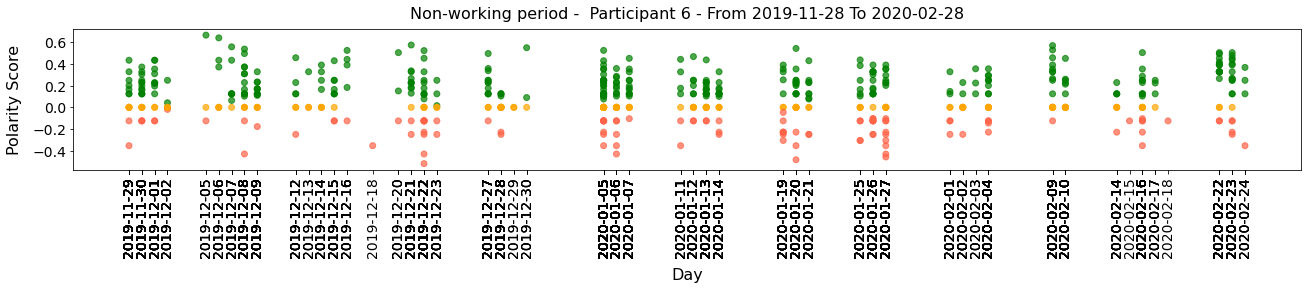

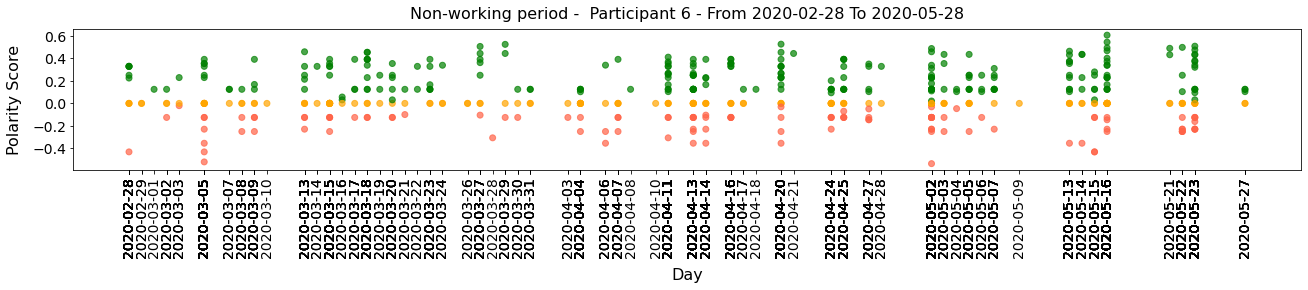

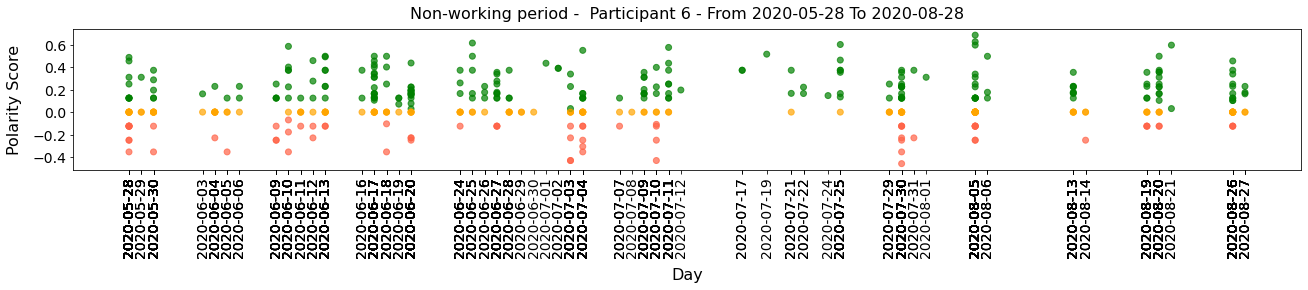

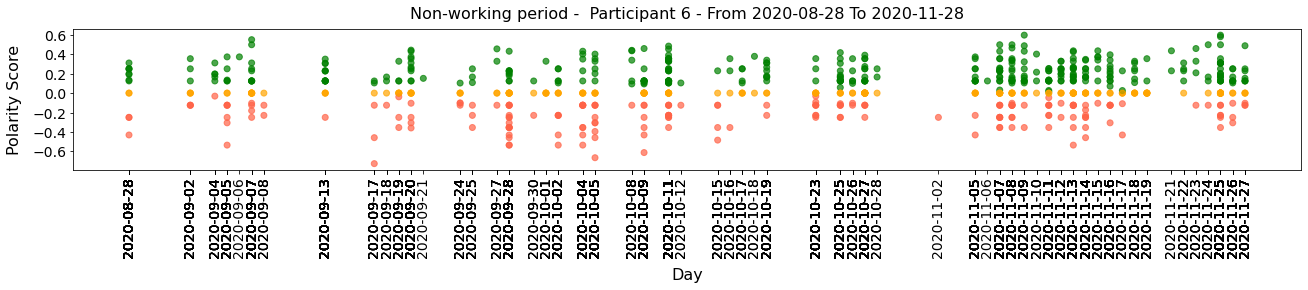

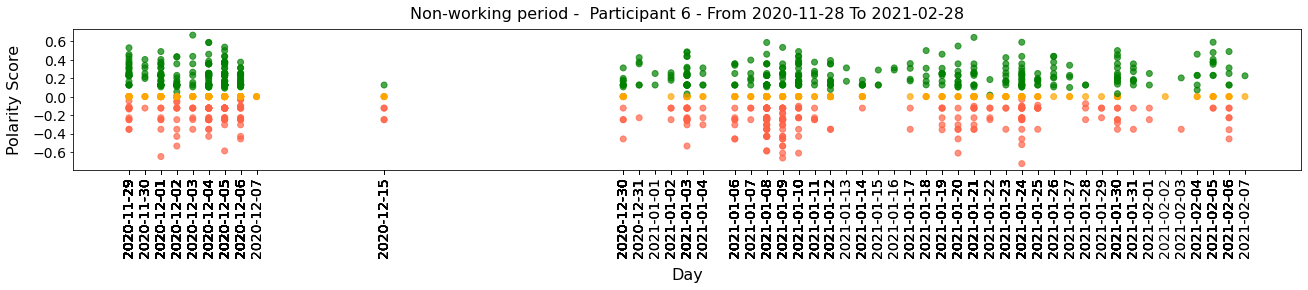

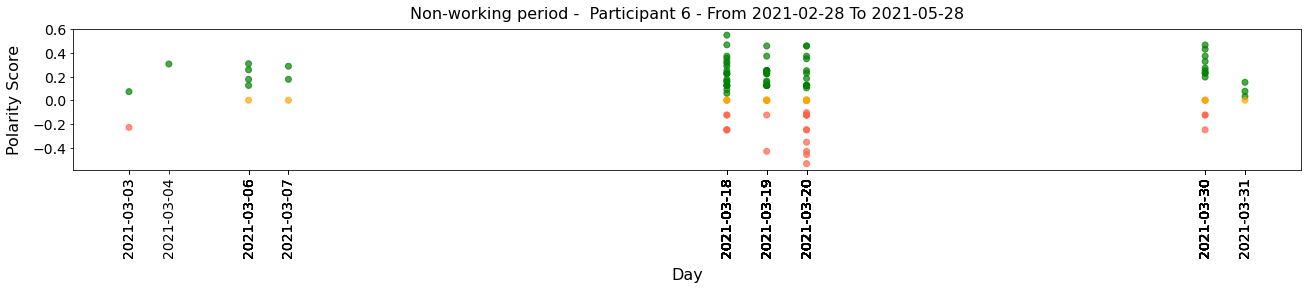

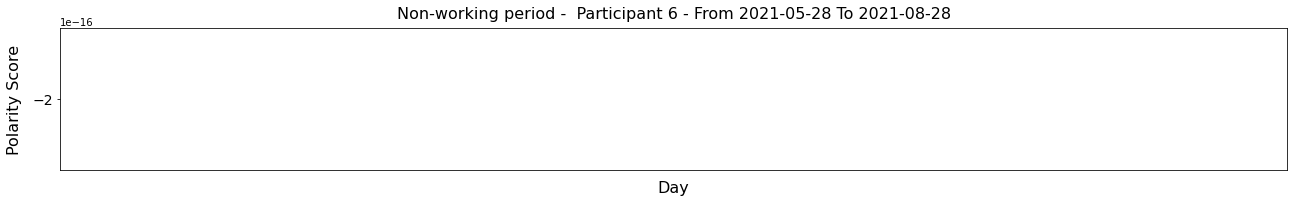

In [42]:
users = list(tweets_df['id_user'].unique())

for u in users:
    p_id = data[u]['participant_id']
    tweets = tweets_df.query('id_user == {}'.format(u))
    work_times_df, non_work_times_df = create_datasets(tweets)
    non_work_times_df = clean_tweets(non_work_times_df)
    
    non_work_times_df['Participant'] = p_id
    non_work_times_df = non_work_times_df.sort_values(by='created_at')
    non_work_times_df["created_at"] = pd.to_datetime(non_work_times_df["created_at"])
    non_work_times_df['date_minus_time'] = non_work_times_df["created_at"].apply(lambda t : datetime.datetime(year=t.year, 
                                                                              month=t.month,
                                                                              day=t.day))
    
    if p_id == 6:
        plot_point_chart(non_work_times_df, u, 'Non-working period - ')